# 神经网络
***Author: NeoWood***

***Date: 2022年3月18日***

In [1]:
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchviz import make_dot

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        '''
        第一层：卷积层
            输入信号通道数为1
            卷积后输出的通道数为25
            卷积核为3*3
            步长为1
        '''
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 25, kernel_size=3),
            nn.BatchNorm2d(25),
            nn.ReLU(inplace=True)
        )

        '''
        第二层：最大池化层
            最大池化窗口大小为2*2
            窗口移动步长为2
        '''
        self.layer2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        '''
        第三层：卷积层
            输入信号通道数为25
            卷积后输出的通道数为50
            卷积核为3*3
            步长为1
        '''
        self.layer3 = nn.Sequential(
            nn.Conv2d(25, 50, kernel_size=3),
            nn.BatchNorm2d(50),
            nn.ReLU(inplace=True)
        )

        '''
        第四层：最大池化层
            最大池化窗口大小为2*2
            窗口移动步长为2
        '''
        self.layer4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        '''
        第五层：全连接层
            第一次：1250 -> 1024
            第二次：1024 -> 128
            第三次：128 -> 10
        '''
        self.fc = nn.Sequential(
            nn.Linear(1250, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.layer1(x)  # 卷积
        x = self.layer2(x)  # 池化
        x = self.layer3(x)  # 卷积
        x = self.layer4(x)  # 池化
        x = x.view(x.size(0), -1)  # 拉直：64*50*5*5 -> 64*1250
        x = self.fc(x)  # 全连接
        return x

<table>
    <tr>
        <th>Input</th>
        <th>Conv</th>
        <th>Max Pooling</th>
        <th>Conv</th>
        <th>Max Pooling</th>
        <th>FC</th>
    </tr>
    <tr>
        <th>1*28*28</th>
        <th>25*26*26</th>
        <th>25*13*13</th>
        <th>50*3*3</th>
        <th>50*5*5</th>
        <th>10</th>
    </tr>
</table>

In [3]:
def train(train_data, epoch_):
    id = 0
    for data in train_data:
        img, label = data
        img = Variable(img)
        label = Variable(label)
        if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()
        out = model(img)
        loss = criterion(out, label)  # 计算损失
        optimizer.zero_grad()
        loss.backward()  # 反向传播，计算当前梯度
        optimizer.step()  # 根据梯度更新网络的参数
        id += 1
        if id % 100 == 0: print('epoch: {}, id: {} loss: {:.4f}'.format(epoch_, id, loss.data.item()))

def test(test_data):
    model.eval()
    eval_loss, eval_acc = 0, 0
    for data in test_data:
        img, label = data
        img = Variable(img)
        label = Variable(label)
        if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()
        out = model(img)
        loss = criterion(out, label)
        eval_loss += loss.data.item() * label.size(0)
        value, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        eval_acc += num_correct.item()
    print('Loss: {:.4f}, Acc: {:.4f}'.format(eval_loss / (len(test_dataset)), eval_acc / (len(test_dataset))))

In [4]:
batch_size = 60
lr = 0.02
epoches = 20

data_tf = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

train_dataset = datasets.MNIST(root='./data/CNN', train=True, transform=data_tf)
test_dataset = datasets.MNIST(root='./data/CNN', train=False, transform=data_tf)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = CNN()
if torch.cuda.is_available():
    print("GPU being used:", torch.cuda.get_device_name(0))
    model = model.cuda()

criterion = nn.CrossEntropyLoss()  # 选取交叉熵损失作为损失函数
optimizer = optim.SGD(model.parameters(), lr=lr)  # 优化器选取随机梯度下降

for epoch in range(1, epoches + 1):
    train(train_loader, epoch)
    test(test_loader)


GPU being used: NVIDIA GeForce GTX 1660 Ti
epoch: 1, id: 100 loss: 0.5192
epoch: 1, id: 200 loss: 0.2103
epoch: 1, id: 300 loss: 0.141
epoch: 1, id: 400 loss: 0.1946
epoch: 1, id: 500 loss: 0.138
epoch: 1, id: 600 loss: 0.1385
epoch: 1, id: 700 loss: 0.03542
epoch: 1, id: 800 loss: 0.04105
epoch: 1, id: 900 loss: 0.06092
epoch: 1, id: 1000 loss: 0.03859
Loss: 0.067319, Acc: 0.979300
epoch: 2, id: 100 loss: 0.02947
epoch: 2, id: 200 loss: 0.09962
epoch: 2, id: 300 loss: 0.01364
epoch: 2, id: 400 loss: 0.1183
epoch: 2, id: 500 loss: 0.01127
epoch: 2, id: 600 loss: 0.01
epoch: 2, id: 700 loss: 0.1213
epoch: 2, id: 800 loss: 0.0268
epoch: 2, id: 900 loss: 0.08549
epoch: 2, id: 1000 loss: 0.01867
Loss: 0.049884, Acc: 0.983800
epoch: 3, id: 100 loss: 0.002891
epoch: 3, id: 200 loss: 0.0278
epoch: 3, id: 300 loss: 0.008112
epoch: 3, id: 400 loss: 0.269
epoch: 3, id: 500 loss: 0.02131
epoch: 3, id: 600 loss: 0.003864
epoch: 3, id: 700 loss: 0.04957
epoch: 3, id: 800 loss: 0.00272
epoch: 3, id:

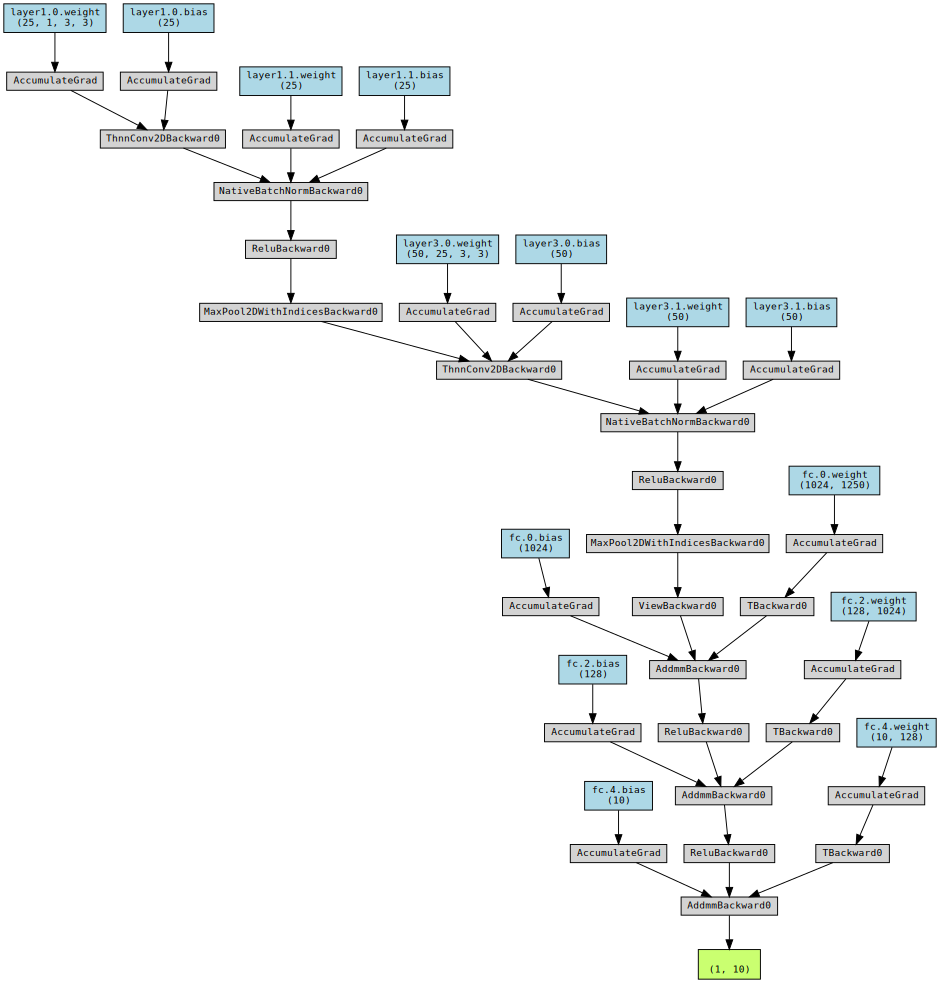

In [5]:
net = CNN()
a = torch.randn(1, 1, 28, 28)
make_dot(net(a), params=dict(net.named_parameters()))